## Milestone 5: Merging the Data and Storing in a Database/Visualizing Data

In [3]:
# First I will import some needed libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import chardet
from bs4 import BeautifulSoup
import sqlite3
from sqlalchemy import create_engine

## Pulling Created Databases for covid_states_data

In [6]:
# First I will create the connection using the imported create_engine 
# function and then invoking the connect method on it.
engine = create_engine('sqlite:///covid_states_data.db', echo=True)
sqlite_connection = engine.connect()

2021-11-10 16:24:33,645 INFO sqlalchemy.engine.base.Engine SELECT CAST('test plain returns' AS VARCHAR(60)) AS anon_1
2021-11-10 16:24:33,646 INFO sqlalchemy.engine.base.Engine ()
2021-11-10 16:24:33,651 INFO sqlalchemy.engine.base.Engine SELECT CAST('test unicode returns' AS VARCHAR(60)) AS anon_1
2021-11-10 16:24:33,653 INFO sqlalchemy.engine.base.Engine ()


In [7]:
# Next I will open my dataframe back up from sql lite that I 
# created in my updated milestone 3 project
# Read sqlite query results into a pandas DataFrame
df = pd.read_sql_query("select * from Covid19_States_Data", sqlite_connection)

# Verify that result of SQL query is stored in the dataframe
print(df.head())

2021-11-10 16:25:34,117 INFO sqlalchemy.engine.base.Engine select * from Covid19_States_Data
2021-11-10 16:25:34,120 INFO sqlalchemy.engine.base.Engine ()
   index                        Date     AK       AZ       CA      CO   HI  \
0      0  2021-01-01 00:00:00.000000  801.0  10060.0  47189.0  3064.0  241   
1      1  2021-01-02 00:00:00.000000  801.0   8883.0  53341.0  2011.0  169   
2      2  2021-01-03 00:00:00.000000  290.0  17234.0  45352.0  2078.0  149   
3      3  2021-01-04 00:00:00.000000  260.0   5158.0  29633.0  2185.0   89   
4      4  2021-01-05 00:00:00.000000  194.0   5932.0  31440.0  3458.0  123   

       ID     MT      NM  ...   MP     PR    VI  Daily_Confirmed_Cases  \
0  1122.0  389.0  1278.0  ...  2.0  677.0   6.0                 174071   
1  1122.0  389.0  1237.0  ...  2.0  835.0   6.0                 258867   
2   308.0  437.0  1015.0  ...  2.0  237.0   6.0                 207306   
3   798.0  283.0   921.0  ...  2.0  558.0  13.0                 165938   
4  153

In [19]:
# Next I will create a query to turn my database into a list
dat = sqlite3.connect('covid_states_data.db')
query = dat.execute("select * from Covid19_States_Data")
cols = [column[0] for column in query.description]
results= pd.DataFrame.from_records(data = query.fetchall(), columns = cols)
print(results)

     index                        Date     AK       AZ       CA      CO   HI  \
0        0  2021-01-01 00:00:00.000000  801.0  10060.0  47189.0  3064.0  241   
1        1  2021-01-02 00:00:00.000000  801.0   8883.0  53341.0  2011.0  169   
2        2  2021-01-03 00:00:00.000000  290.0  17234.0  45352.0  2078.0  149   
3        3  2021-01-04 00:00:00.000000  260.0   5158.0  29633.0  2185.0   89   
4        4  2021-01-05 00:00:00.000000  194.0   5932.0  31440.0  3458.0  123   
..     ...                         ...    ...      ...      ...     ...  ...   
305    315  2021-11-02 00:00:00.000000  491.0   2350.0   4209.0  2396.0   35   
306    316  2021-11-03 00:00:00.000000  667.0   2180.0   3518.0  2747.0  159   
307    317  2021-11-04 00:00:00.000000  641.0   3552.0   5608.0  4149.0  100   
308    318  2021-11-05 00:00:00.000000  856.0   3813.0   8012.0  3306.0  112   
309    319  2021-11-06 00:00:00.000000  856.0   3592.0   8012.0  3306.0   76   

         ID      MT      NM  ...    MP 

In [14]:
# convert list to dataframe
State_Covid_Data=pd.DataFrame(results[0])
print(State_Covid_Data.head())

KeyError: 0

In [17]:
# Next I will check and make sure the dataframe was created
States_Covid_Data = results
States_Covid_Data

,index,Date,AK,AZ,CA,CO,HI,ID,MT,NM,...,MP,PR,VI,Daily_Confirmed_Cases,Total_Confirmed_Cases,Daily_Deaths,Total_Deaths,Daily_Recovered,Total_Recovered,Total_Active
0,0,2021-01-01 00:00:00.000000,801.0,10060.0,47189.0,3064.0,241,1122.0,389.0,1278.0,...,2.0,677.0,6.0,174071,19179864,2444,329311,50035,12175841,6674712
1,1,2021-01-02 00:00:00.000000,801.0,8883.0,53341.0,2011.0,169,1122.0,389.0,1237.0,...,2.0,835.0,6.0,258867,19438731,2252,331563,185546,12361387,6745781
2,2,2021-01-03 00:00:00.000000,290.0,17234.0,45352.0,2078.0,149,308.0,437.0,1015.0,...,2.0,237.0,6.0,207306,19646037,1370,332933,75571,12436958,6876146
3,3,2021-01-04 00:00:00.000000,260.0,5158.0,29633.0,2185.0,89,798.0,283.0,921.0,...,2.0,558.0,13.0,165938,19811975,1608,334541,299554,12736512,6740922
4,4,2021-01-05 00:00:00.000000,194.0,5932.0,31440.0,3458.0,123,1538.0,714.0,1184.0,...,2.0,501.0,28.0,202188,20014163,3424,337965,125704,12862216,6813982
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305,315,2021-11-02 00:00:00.000000,491.0,2350.0,4209.0,2396.0,35,924.0,1138.0,674.0,...,11.0,8.0,27.0,64025,42101654,1394,710193,120565,37000328,4391133
306,316,2021-11-03 00:00:00.000000,667.0,2180.0,3518.0,2747.0,159,1244.0,866.0,1161.0,...,1.0,62.0,18.0,70097,42171751,1796,711989,116276,37116604,4343158
307,317,2021-11-04 00:00:00.000000,641.0,3552.0,5608.0,4149.0,100,662.0,790.0,1612.0,...,9.0,115.0,9.0,69763,42241514,1155,713144,77507,37194111,4334259
308,318,2021-11-05 00:00:00.000000,856.0,3813.0,8012.0,3306.0,112,803.0,682.0,1460.0,...,4.0,45.0,15.0,93595,42335109,2243,715387,75398,37269509,4350213


## Pulling Created Databases for January_covid_data

In [18]:
# First I will create the connection using the imported create_engine 
# function and then invoking the connect method on it for my January dataframe.
January_Data_engine = create_engine('sqlite:///January_covid_data.db', echo=True)
January_Data_sqlite_connection = January_Data_engine.connect()

2021-11-10 16:53:29,484 INFO sqlalchemy.engine.base.Engine SELECT CAST('test plain returns' AS VARCHAR(60)) AS anon_1
2021-11-10 16:53:29,491 INFO sqlalchemy.engine.base.Engine ()
2021-11-10 16:53:29,494 INFO sqlalchemy.engine.base.Engine SELECT CAST('test unicode returns' AS VARCHAR(60)) AS anon_1
2021-11-10 16:53:29,495 INFO sqlalchemy.engine.base.Engine ()


In [20]:
# Next I will create a query to turn my database into a list
dat = sqlite3.connect('January_covid_data.db')
query = dat.execute("select * from January_Covid19_Data")
cols = [column[0] for column in query.description]
January_Covid_Data= pd.DataFrame.from_records(data = query.fetchall(), columns = cols)
print(January_Covid_Data)

    index                        Date     AK       AZ       CA      CO   HI  \
0       0  2021-01-01 00:00:00.000000  801.0  10060.0  47189.0  3064.0  241   
1       1  2021-01-02 00:00:00.000000  801.0   8883.0  53341.0  2011.0  169   
2       2  2021-01-03 00:00:00.000000  290.0  17234.0  45352.0  2078.0  149   
3       3  2021-01-04 00:00:00.000000  260.0   5158.0  29633.0  2185.0   89   
4       4  2021-01-05 00:00:00.000000  194.0   5932.0  31440.0  3458.0  123   
5       5  2021-01-06 00:00:00.000000  328.0   7206.0  29892.0  2557.0  142   
6       6  2021-01-07 00:00:00.000000  326.0   9913.0  36385.0  3473.0  321   
7       7  2021-01-08 00:00:00.000000  403.0  11658.0  50030.0  3187.0  264   
8       8  2021-01-09 00:00:00.000000  311.0  11094.0  52636.0  2837.0  248   
9       9  2021-01-10 00:00:00.000000  250.0  11201.0  49685.0  2201.0  198   
10     10  2021-01-11 00:00:00.000000  173.0   8995.0  39839.0  1677.0  172   
11     11  2021-01-12 00:00:00.000000  121.0   8559.

In [22]:
# Next I will check and make sure the dataframe was created
January_Covid_Data

,index,Date,AK,AZ,CA,CO,HI,ID,MT,NM,...,MP,PR,VI,Daily_Confirmed_Cases,Total_Confirmed_Cases,Daily_Deaths,Total_Deaths,Daily_Recovered,Total_Recovered,Total_Active
0,0,2021-01-01 00:00:00.000000,801.0,10060.0,47189.0,3064.0,241,1122.0,389.0,1278.0,...,2.0,677.0,6.0,174071,19179864,2444,329311,50035,12175841,6674712
1,1,2021-01-02 00:00:00.000000,801.0,8883.0,53341.0,2011.0,169,1122.0,389.0,1237.0,...,2.0,835.0,6.0,258867,19438731,2252,331563,185546,12361387,6745781
2,2,2021-01-03 00:00:00.000000,290.0,17234.0,45352.0,2078.0,149,308.0,437.0,1015.0,...,2.0,237.0,6.0,207306,19646037,1370,332933,75571,12436958,6876146
3,3,2021-01-04 00:00:00.000000,260.0,5158.0,29633.0,2185.0,89,798.0,283.0,921.0,...,2.0,558.0,13.0,165938,19811975,1608,334541,299554,12736512,6740922
4,4,2021-01-05 00:00:00.000000,194.0,5932.0,31440.0,3458.0,123,1538.0,714.0,1184.0,...,2.0,501.0,28.0,202188,20014163,3424,337965,125704,12862216,6813982
5,5,2021-01-06 00:00:00.000000,328.0,7206.0,29892.0,2557.0,142,1263.0,682.0,1485.0,...,2.0,298.0,23.0,225048,20239211,3670,341635,161926,13024142,6873434
6,6,2021-01-07 00:00:00.000000,326.0,9913.0,36385.0,3473.0,321,1067.0,690.0,1835.0,...,1.0,211.0,24.0,250394,20489605,3916,345551,119175,13143317,7000737
7,7,2021-01-08 00:00:00.000000,403.0,11658.0,50030.0,3187.0,264,1085.0,818.0,1637.0,...,1.0,1759.0,13.0,274627,20764232,3555,349106,116632,13259949,7155177
8,8,2021-01-09 00:00:00.000000,311.0,11094.0,52636.0,2837.0,248,977.0,534.0,1498.0,...,1.0,554.0,13.0,247540,21011772,3437,352543,133129,13393078,7266151
9,9,2021-01-10 00:00:00.000000,250.0,11201.0,49685.0,2201.0,198,432.0,222.0,1203.0,...,1.0,350.0,13.0,210847,21222619,2004,354547,90412,13483490,7384582


## Pulling Created Databases for Covid19_Deaths Data

In [23]:
# First I will create the connection using the imported create_engine 
# function and then invoking the connect method on it.
engine = create_engine('sqlite:///save_pandas.db', echo=True)
sqlite_connection = engine.connect()

2021-11-10 17:03:25,639 INFO sqlalchemy.engine.base.Engine SELECT CAST('test plain returns' AS VARCHAR(60)) AS anon_1
2021-11-10 17:03:25,641 INFO sqlalchemy.engine.base.Engine ()
2021-11-10 17:03:25,644 INFO sqlalchemy.engine.base.Engine SELECT CAST('test unicode returns' AS VARCHAR(60)) AS anon_1
2021-11-10 17:03:25,646 INFO sqlalchemy.engine.base.Engine ()


In [24]:
# Next I will create a query to turn my database into a list
dat = sqlite3.connect('save_pandas.db')
query = dat.execute("select * from Covid19_Deaths")
cols = [column[0] for column in query.description]
Covid19_Deaths_Data= pd.DataFrame.from_records(data = query.fetchall(), columns = cols)
print(Covid19_Deaths_Data)

       index Start Date End Date     Group    Year      Month          State  \
0          1     1/1/20  9/11/21  By Total     NaN       None  United States   
1          2     1/1/20  9/11/21  By Total     NaN       None  United States   
2          3     1/1/20  9/11/21  By Total     NaN       None  United States   
3          4     1/1/20  9/11/21  By Total     NaN       None  United States   
4          5     1/1/20  9/11/21  By Total     NaN       None  United States   
...      ...        ...      ...       ...     ...        ...            ...   
49296  66091     9/1/21  9/11/21  By Month  2021.0  September    Puerto Rico   
49297  66092     9/1/21  9/11/21  By Month  2021.0  September    Puerto Rico   
49298  66093     9/1/21  9/11/21  By Month  2021.0  September    Puerto Rico   
49299  66094     9/1/21  9/11/21  By Month  2021.0  September    Puerto Rico   
49300  66095     9/1/21  9/11/21  By Month  2021.0  September    Puerto Rico   

             Sex          Age_Group  CO

In [25]:
# Next I will check and see if my data was put into a dataframe
Covid19_Deaths_Data

,index,Start Date,End Date,Group,Year,Month,State,Sex,Age_Group,COVID_19_Deaths,Total_Deaths,Pneumonia_Deaths,Pneumonia_and_COVID_19_Deaths,Influenza_Deaths,Pneumonia_Influenza_and_COVID_19_Deaths
0,1,1/1/20,9/11/21,By Total,NaN,None,United States,All Sexes,Under 1 year,105.0,31744.0,344.0,13.0,22.0,458.0
1,2,1/1/20,9/11/21,By Total,NaN,None,United States,All Sexes,0-17 years,439.0,56092.0,949.0,103.0,188.0,1473.0
2,3,1/1/20,9/11/21,By Total,NaN,None,United States,All Sexes,1-4 years,54.0,5881.0,192.0,11.0,65.0,300.0
3,4,1/1/20,9/11/21,By Total,NaN,None,United States,All Sexes,5-14 years,145.0,9374.0,275.0,43.0,80.0,457.0
4,5,1/1/20,9/11/21,By Total,NaN,None,United States,All Sexes,15-24 years,1297.0,60337.0,1363.0,529.0,80.0,2206.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49296,66091,9/1/21,9/11/21,By Month,2021.0,September,Puerto Rico,Female,50-64 years,0.0,0.0,0.0,0.0,0.0,0.0
49297,66092,9/1/21,9/11/21,By Month,2021.0,September,Puerto Rico,Female,55-64 years,0.0,0.0,0.0,0.0,0.0,0.0
49298,66093,9/1/21,9/11/21,By Month,2021.0,September,Puerto Rico,Female,65-74 years,0.0,0.0,0.0,0.0,0.0,0.0
49299,66094,9/1/21,9/11/21,By Month,2021.0,September,Puerto Rico,Female,75-84 years,0.0,0.0,0.0,0.0,0.0,0.0


## Pulling Created Databases for vaccine_data

In [32]:
# Next I will create the connection using the imported create_engine 
# function and then invoking the connect method on it for my Vaccine dataframe.
engine = create_engine('sqlite:///Covid19_vaccine_data.db', echo=True)
sqlite_connection = engine.connect()

2021-11-10 17:37:09,967 INFO sqlalchemy.engine.base.Engine SELECT CAST('test plain returns' AS VARCHAR(60)) AS anon_1
2021-11-10 17:37:09,968 INFO sqlalchemy.engine.base.Engine ()
2021-11-10 17:37:09,970 INFO sqlalchemy.engine.base.Engine SELECT CAST('test unicode returns' AS VARCHAR(60)) AS anon_1
2021-11-10 17:37:09,972 INFO sqlalchemy.engine.base.Engine ()


In [34]:
# Next I will open my data frame back up from sql lite
# Read sqlite query results into a pandas DataFrame
Vaccine_df = pd.read_sql_query("select * from Covid19_vaccine", sqlite_connection)

# Verify that result of SQL query is stored in the dataframe
print(Vaccine_df.head())

2021-11-10 17:41:10,645 INFO sqlalchemy.engine.base.Engine select * from Covid19_vaccine
2021-11-10 17:41:10,657 INFO sqlalchemy.engine.base.Engine ()
   index                     Date State Doses_Administered_Daily  \
0      0  2021-11-02T00:00:00.000    GA                        0   
1      1  2021-11-02T00:00:00.000    WA                   102215   
2      2  2021-11-02T00:00:00.000    KY                     5510   
3      3  2021-11-02T00:00:00.000    AL                        0   
4      4  2021-11-02T00:00:00.000    CT                        0   

  Doses_Administered_Cumulative Doses_Administered_7_Day_Rolling  \
0                      11482176                             7327   
1                      10428348                            35002   
2                       4933551                           -44887   
3                       4889817                             8666   
4                       5453446                            11650   

  First_Dose_Admin_daily First_

In [35]:
# Next I will check and see if my data was put into a dataframe
Vaccine_df

,index,Date,State,Doses_Administered_Daily,Doses_Administered_Cumulative,Doses_Administered_7_Day_Rolling,First_Dose_Admin_daily,First_Dose_Admin_Cumulative,First_Dose_Admin_rolling,Admin_or_Reported,Administered_Daily_Change,Administered_Daily_Change_Average,Fully_Vaccinated_Daily,Fully_Vaccinated_Cumulative,Fully_Vaccinated_Rolling,Month
0,0,2021-11-02T00:00:00.000,GA,0,11482176,7327,0,6011533,1174,Admin,0,7327,0,5116933,1472,November
1,1,2021-11-02T00:00:00.000,WA,102215,10428348,35002,14924,5282202,5363,Report,102215,35002,11923,4846302,4741,November
2,2,2021-11-02T00:00:00.000,KY,5510,4933551,-44887,1199,2551688,-32623,Report,5510,-44887,928,2268640,-23971,November
3,3,2021-11-02T00:00:00.000,AL,0,4889817,8666,0,2624582,1893,Admin,0,8667,0,2198529,1424,November
4,4,2021-11-02T00:00:00.000,CT,0,5453446,11650,0,2824291,2676,Admin,0,11651,0,2524452,975,November
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38995,38996,2020-12-13T00:00:00.000,MI,0,0,0,0,0,0,Report,0,0,0,0,0,December
38996,38997,2020-12-13T00:00:00.000,IN,475,475,475,454,454,454,Admin,475,475,32,32,32,December
38997,38998,2020-12-13T00:00:00.000,AR,654,654,654,638,638,638,Admin,654,654,18,18,18,December
38998,38999,2020-12-13T00:00:00.000,AL,293,293,293,292,292,292,Admin,293,293,10,10,10,December


## Filter Data to Merge Data Sets

In [39]:
# First I will pull the Covid19_Deaths_Data dataframe to see what I can
# filter to allow me to combine with other data frames
Vaccine_df

,index,Date,State,Doses_Administered_Daily,Doses_Administered_Cumulative,Doses_Administered_7_Day_Rolling,First_Dose_Admin_daily,First_Dose_Admin_Cumulative,First_Dose_Admin_rolling,Admin_or_Reported,Administered_Daily_Change,Administered_Daily_Change_Average,Fully_Vaccinated_Daily,Fully_Vaccinated_Cumulative,Fully_Vaccinated_Rolling,Month
0,0,2021-11-02T00:00:00.000,GA,0,11482176,7327,0,6011533,1174,Admin,0,7327,0,5116933,1472,November
1,1,2021-11-02T00:00:00.000,WA,102215,10428348,35002,14924,5282202,5363,Report,102215,35002,11923,4846302,4741,November
2,2,2021-11-02T00:00:00.000,KY,5510,4933551,-44887,1199,2551688,-32623,Report,5510,-44887,928,2268640,-23971,November
3,3,2021-11-02T00:00:00.000,AL,0,4889817,8666,0,2624582,1893,Admin,0,8667,0,2198529,1424,November
4,4,2021-11-02T00:00:00.000,CT,0,5453446,11650,0,2824291,2676,Admin,0,11651,0,2524452,975,November
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38995,38996,2020-12-13T00:00:00.000,MI,0,0,0,0,0,0,Report,0,0,0,0,0,December
38996,38997,2020-12-13T00:00:00.000,IN,475,475,475,454,454,454,Admin,475,475,32,32,32,December
38997,38998,2020-12-13T00:00:00.000,AR,654,654,654,638,638,638,Admin,654,654,18,18,18,December
38998,38999,2020-12-13T00:00:00.000,AL,293,293,293,292,292,292,Admin,293,293,10,10,10,December


In [40]:
# Next I will filter my data to see the vaccine data for the month of January
Vaccine_January_Data = Vaccine_df[(Vaccine_df["Month"]=="January")]
Vaccine_January_Data

,index,Date,State,Doses_Administered_Daily,Doses_Administered_Cumulative,Doses_Administered_7_Day_Rolling,First_Dose_Admin_daily,First_Dose_Admin_Cumulative,First_Dose_Admin_rolling,Admin_or_Reported,Administered_Daily_Change,Administered_Daily_Change_Average,Fully_Vaccinated_Daily,Fully_Vaccinated_Cumulative,Fully_Vaccinated_Rolling,Month
33000,33000,2021-01-31T00:00:00.000,WY,108,72279,2720,61,58516,1775,Admin,108,2721,44,12771,895,January
33001,33001,2021-01-31T00:00:00.000,NE,10435,177711,6409,7739,133002,3306,Report,10435,6409,0,0,0,January
33002,33002,2021-01-31T00:00:00.000,RP,0,3111,9,0,3110,9,Admin,0,9,0,10,1,January
33003,33003,2021-01-31T00:00:00.000,PA,19412,1515285,63918,13980,1200537,46268,Admin,19412,63919,5329,307813,17246,January
33004,33004,2021-01-31T00:00:00.000,VI,41,6008,376,22,4920,279,Report,41,376,0,0,0,January
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36715,36716,2021-01-01T00:00:00.000,NY,3792,347777,25250,3507,320133,23796,Admin,3792,25250,307,2337,230,January
36716,36717,2021-01-01T00:00:00.000,WV,349,56589,3664,346,56504,3661,Admin,349,3664,2,19,1,January
36717,36718,2021-01-01T00:00:00.000,NE,989,50137,3691,842,48895,3591,Admin,989,3692,132,594,61,January
36718,36719,2021-01-01T00:00:00.000,OH,25338,119464,13457,25317,119398,13448,Report,25338,13457,0,0,0,January


In [41]:
# Next I will filter my data to see the vaccine data for to be for 
# the whole United States
US_Jan_Vac_Data = Vaccine_January_Data[(Vaccine_January_Data["State"]=="US")]
US_Jan_Vac_Data

,index,Date,State,Doses_Administered_Daily,Doses_Administered_Cumulative,Doses_Administered_7_Day_Rolling,First_Dose_Admin_daily,First_Dose_Admin_Cumulative,First_Dose_Admin_rolling,Admin_or_Reported,Administered_Daily_Change,Administered_Daily_Change_Average,Fully_Vaccinated_Daily,Fully_Vaccinated_Cumulative,Fully_Vaccinated_Rolling,Month
33044,33044,2021-01-31T00:00:00.000,US,461338,37463304,1463242,326919,29596168,996997,Admin,461338,1463242,124284,7227518,439340,January
33060,33060,2021-01-31T00:00:00.000,US,1545397,31123299,1324949,1136978,25201143,957002,Report,1545397,1324949,0,0,0,January
33145,33145,2021-01-30T00:00:00.000,US,1693241,29577902,1291416,1205847,24064165,953403,Report,1693241,1291416,0,0,0,January
33176,33176,2021-01-30T00:00:00.000,US,1019470,37001966,1453881,764180,29269249,993450,Admin,1019470,1453881,238417,7103234,433996,January
33308,33308,2021-01-29T00:00:00.000,US,1690979,27884661,1253815,1159712,22858318,945032,Report,1690979,1253815,0,0,0,January
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36464,36464,2021-01-03T00:00:00.000,US,136662,6075861,433254,129461,5932314,422503,Admin,136662,433254,2397,40959,3748,January
36528,36528,2021-01-02T00:00:00.000,US,260824,5939199,427418,252290,5802853,417296,Admin,260824,427418,2557,38562,3484,January
36550,36550,2021-01-02T00:00:00.000,US,290402,4463060,324664,288674,4431654,322214,Report,290402,324664,0,0,0,January
36668,36668,2021-01-01T00:00:00.000,US,81184,5678375,410275,74801,5550563,400961,Admin,81184,410275,5170,36005,3200,January


In [42]:
# Next I will filter my data to see the vaccine data for to be for 
# the data that has been administered as this data is more accurate and complete
Vacc_Admin_Data = US_Jan_Vac_Data[(US_Jan_Vac_Data["Admin_or_Reported"]=="Admin")]
Vacc_Admin_Data

,index,Date,State,Doses_Administered_Daily,Doses_Administered_Cumulative,Doses_Administered_7_Day_Rolling,First_Dose_Admin_daily,First_Dose_Admin_Cumulative,First_Dose_Admin_rolling,Admin_or_Reported,Administered_Daily_Change,Administered_Daily_Change_Average,Fully_Vaccinated_Daily,Fully_Vaccinated_Cumulative,Fully_Vaccinated_Rolling,Month
33044,33044,2021-01-31T00:00:00.000,US,461338,37463304,1463242,326919,29596168,996997,Admin,461338,1463242,124284,7227518,439340,January
33176,33176,2021-01-30T00:00:00.000,US,1019470,37001966,1453881,764180,29269249,993450,Admin,1019470,1453881,238417,7103234,433996,January
33325,33325,2021-01-29T00:00:00.000,US,1892100,35982496,1437397,1362382,28505069,990369,Admin,1892100,1437398,483225,6864817,421000,January
33415,33415,2021-01-28T00:00:00.000,US,1947104,34090396,1397910,1368348,27142687,994116,Admin,1947104,1397911,545470,6381592,381300,January
33528,33528,2021-01-27T00:00:00.000,US,1916973,32143292,1352950,1249371,25774339,989875,Admin,1916973,1352950,635748,5836122,341968,January
33710,33710,2021-01-26T00:00:00.000,US,1649452,30226319,1309878,1053225,24524968,979068,Admin,1649452,1309878,570272,5200374,310754,January
33820,33820,2021-01-25T00:00:00.000,US,1356260,28576867,1266002,854555,23471743,967131,Admin,1356260,1266003,477970,4630102,279340,January
33931,33931,2021-01-24T00:00:00.000,US,395811,27220607,1197908,302089,22617188,935988,Admin,395811,1197908,86873,4152132,243439,January
33985,33985,2021-01-23T00:00:00.000,US,904085,26824796,1185085,742616,22315099,929538,Admin,904085,1185086,147443,4065259,236997,January
34102,34102,2021-01-22T00:00:00.000,US,1615689,25920711,1149167,1388609,21572483,904990,Admin,1615689,1149167,205327,3917816,226116,January


In [45]:
# Next I will use the to_datetime() function to convert the ‘date’ 
# column to a datetime object
Vacc_Admin_Data['Date'] = pd.to_datetime(Vacc_Admin_Data['Date'])

<ipython-input-45-4d6e21bbdccd>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Vacc_Admin_Data['Date'] = pd.to_datetime(Vacc_Admin_Data['Date'])


In [46]:
# Next I will use the sort the DataFrame based on the date column 
# using the sort_values() function
Vacc_Admin_Data.sort_values(by='Date')

,index,Date,State,Doses_Administered_Daily,Doses_Administered_Cumulative,Doses_Administered_7_Day_Rolling,First_Dose_Admin_daily,First_Dose_Admin_Cumulative,First_Dose_Admin_rolling,Admin_or_Reported,Administered_Daily_Change,Administered_Daily_Change_Average,Fully_Vaccinated_Daily,Fully_Vaccinated_Cumulative,Fully_Vaccinated_Rolling,Month
36668,36668,2021-01-01,US,81184,5678375,410275,74801,5550563,400961,Admin,81184,410275,5170,36005,3200,January
36528,36528,2021-01-02,US,260824,5939199,427418,252290,5802853,417296,Admin,260824,427418,2557,38562,3484,January
36464,36464,2021-01-03,US,136662,6075861,433254,129461,5932314,422503,Admin,136662,433254,2397,40959,3748,January
36247,36247,2021-01-04,US,648212,6724073,442165,590919,6523233,424906,Admin,648212,442166,44777,85736,9722,January
36217,36217,2021-01-05,US,821356,7545429,457415,722864,7246097,428427,Admin,821356,457416,87031,172767,21567,January
36050,36050,2021-01-06,US,1011927,8557356,482702,825326,8071423,429444,Admin,1011927,482702,170616,343383,45036,January
35993,35993,2021-01-07,US,1157826,9715182,588284,859245,8930668,493558,Admin,1157826,588284,277775,621158,84331,January
35793,35793,2021-01-08,US,1223742,10938924,751507,839802,9770470,602844,Admin,1223742,751507,359838,980996,134998,January
35731,35731,2021-01-09,US,504704,11443628,786347,367952,10138422,619367,Admin,504704,786347,127707,1108703,152877,January
35533,35533,2021-01-10,US,248337,11691965,802300,174694,10313116,625829,Admin,248337,802301,68686,1177389,162347,January


In [43]:
# First I will pull the January_Covid_Data dataframe to see what I can
# filter to allow me to combine with other data frames
January_Covid_Data

,index,Date,AK,AZ,CA,CO,HI,ID,MT,NM,...,MP,PR,VI,Daily_Confirmed_Cases,Total_Confirmed_Cases,Daily_Deaths,Total_Deaths,Daily_Recovered,Total_Recovered,Total_Active
0,0,2021-01-01 00:00:00.000000,801.0,10060.0,47189.0,3064.0,241,1122.0,389.0,1278.0,...,2.0,677.0,6.0,174071,19179864,2444,329311,50035,12175841,6674712
1,1,2021-01-02 00:00:00.000000,801.0,8883.0,53341.0,2011.0,169,1122.0,389.0,1237.0,...,2.0,835.0,6.0,258867,19438731,2252,331563,185546,12361387,6745781
2,2,2021-01-03 00:00:00.000000,290.0,17234.0,45352.0,2078.0,149,308.0,437.0,1015.0,...,2.0,237.0,6.0,207306,19646037,1370,332933,75571,12436958,6876146
3,3,2021-01-04 00:00:00.000000,260.0,5158.0,29633.0,2185.0,89,798.0,283.0,921.0,...,2.0,558.0,13.0,165938,19811975,1608,334541,299554,12736512,6740922
4,4,2021-01-05 00:00:00.000000,194.0,5932.0,31440.0,3458.0,123,1538.0,714.0,1184.0,...,2.0,501.0,28.0,202188,20014163,3424,337965,125704,12862216,6813982
5,5,2021-01-06 00:00:00.000000,328.0,7206.0,29892.0,2557.0,142,1263.0,682.0,1485.0,...,2.0,298.0,23.0,225048,20239211,3670,341635,161926,13024142,6873434
6,6,2021-01-07 00:00:00.000000,326.0,9913.0,36385.0,3473.0,321,1067.0,690.0,1835.0,...,1.0,211.0,24.0,250394,20489605,3916,345551,119175,13143317,7000737
7,7,2021-01-08 00:00:00.000000,403.0,11658.0,50030.0,3187.0,264,1085.0,818.0,1637.0,...,1.0,1759.0,13.0,274627,20764232,3555,349106,116632,13259949,7155177
8,8,2021-01-09 00:00:00.000000,311.0,11094.0,52636.0,2837.0,248,977.0,534.0,1498.0,...,1.0,554.0,13.0,247540,21011772,3437,352543,133129,13393078,7266151
9,9,2021-01-10 00:00:00.000000,250.0,11201.0,49685.0,2201.0,198,432.0,222.0,1203.0,...,1.0,350.0,13.0,210847,21222619,2004,354547,90412,13483490,7384582


In [47]:
# Next I will use the to_datetime() function to convert the ‘date’ 
# column to a datetime object
January_Covid_Data['Date'] = pd.to_datetime(January_Covid_Data['Date'])

In [48]:
# Next I will use the sort the DataFrame based on the date column 
# using the sort_values() function
January_Covid_Data.sort_values(by='Date')

,index,Date,AK,AZ,CA,CO,HI,ID,MT,NM,...,MP,PR,VI,Daily_Confirmed_Cases,Total_Confirmed_Cases,Daily_Deaths,Total_Deaths,Daily_Recovered,Total_Recovered,Total_Active
0,0,2021-01-01,801.0,10060.0,47189.0,3064.0,241,1122.0,389.0,1278.0,...,2.0,677.0,6.0,174071,19179864,2444,329311,50035,12175841,6674712
1,1,2021-01-02,801.0,8883.0,53341.0,2011.0,169,1122.0,389.0,1237.0,...,2.0,835.0,6.0,258867,19438731,2252,331563,185546,12361387,6745781
2,2,2021-01-03,290.0,17234.0,45352.0,2078.0,149,308.0,437.0,1015.0,...,2.0,237.0,6.0,207306,19646037,1370,332933,75571,12436958,6876146
3,3,2021-01-04,260.0,5158.0,29633.0,2185.0,89,798.0,283.0,921.0,...,2.0,558.0,13.0,165938,19811975,1608,334541,299554,12736512,6740922
4,4,2021-01-05,194.0,5932.0,31440.0,3458.0,123,1538.0,714.0,1184.0,...,2.0,501.0,28.0,202188,20014163,3424,337965,125704,12862216,6813982
5,5,2021-01-06,328.0,7206.0,29892.0,2557.0,142,1263.0,682.0,1485.0,...,2.0,298.0,23.0,225048,20239211,3670,341635,161926,13024142,6873434
6,6,2021-01-07,326.0,9913.0,36385.0,3473.0,321,1067.0,690.0,1835.0,...,1.0,211.0,24.0,250394,20489605,3916,345551,119175,13143317,7000737
7,7,2021-01-08,403.0,11658.0,50030.0,3187.0,264,1085.0,818.0,1637.0,...,1.0,1759.0,13.0,274627,20764232,3555,349106,116632,13259949,7155177
8,8,2021-01-09,311.0,11094.0,52636.0,2837.0,248,977.0,534.0,1498.0,...,1.0,554.0,13.0,247540,21011772,3437,352543,133129,13393078,7266151
9,9,2021-01-10,250.0,11201.0,49685.0,2201.0,198,432.0,222.0,1203.0,...,1.0,350.0,13.0,210847,21222619,2004,354547,90412,13483490,7384582


In [67]:
# Next I will create a updated dataframe for the January_Covid_Data 
# that has dropped columns that are not needed
Updated_January_Covid_Data = January_Covid_Data.drop(['AK',
 'AZ',
 'CA',
 'CO',
 'HI',
 'ID',
 'MT',
 'NM',
 'NV',
 'OR',
 'UT',
 'WA',
 'WY',
 'IA',
 'IL',
 'IN',
 'KS',
 'MI',
 'MN',
 'MO',
 'ND',
 'NE',
 'OH',
 'OK',
 'SD',
 'WI',
 'AL',
 'AR',
 'FL',
 'GA',
 'KY',
 'LA',
 'MS',
 'NC',
 'SC',
 'TN',
 'TX',
 'VA',
 'WV',
 'CT',
 'DC',
 'DE',
 'MA',
 'MD',
 'ME',
 'NH',
 'NJ',
 'NY',
 'PA',
 'RI',
 'VT',
 'GU',
 'MP',
 'PR',
 'VI', 'index'], axis=1)
Updated_January_Covid_Data

,Date,Daily_Confirmed_Cases,Total_Confirmed_Cases,Daily_Deaths,Total_Deaths,Daily_Recovered,Total_Recovered,Total_Active
0,2021-01-01,174071,19179864,2444,329311,50035,12175841,6674712
1,2021-01-02,258867,19438731,2252,331563,185546,12361387,6745781
2,2021-01-03,207306,19646037,1370,332933,75571,12436958,6876146
3,2021-01-04,165938,19811975,1608,334541,299554,12736512,6740922
4,2021-01-05,202188,20014163,3424,337965,125704,12862216,6813982
5,2021-01-06,225048,20239211,3670,341635,161926,13024142,6873434
6,2021-01-07,250394,20489605,3916,345551,119175,13143317,7000737
7,2021-01-08,274627,20764232,3555,349106,116632,13259949,7155177
8,2021-01-09,247540,21011772,3437,352543,133129,13393078,7266151
9,2021-01-10,210847,21222619,2004,354547,90412,13483490,7384582


In [69]:
# Next I will create a updated dataframe that has dropped columns 
# that are not needed
Updated_Vacc_Admin_Data = Vacc_Admin_Data.drop(['index', 'Admin_or_Reported'], axis=1)
Updated_Vacc_Admin_Data

,Date,State,Doses_Administered_Daily,Doses_Administered_Cumulative,Doses_Administered_7_Day_Rolling,First_Dose_Admin_daily,First_Dose_Admin_Cumulative,First_Dose_Admin_rolling,Administered_Daily_Change,Administered_Daily_Change_Average,Fully_Vaccinated_Daily,Fully_Vaccinated_Cumulative,Fully_Vaccinated_Rolling,Month
33044,2021-01-31,US,461338,37463304,1463242,326919,29596168,996997,461338,1463242,124284,7227518,439340,January
33176,2021-01-30,US,1019470,37001966,1453881,764180,29269249,993450,1019470,1453881,238417,7103234,433996,January
33325,2021-01-29,US,1892100,35982496,1437397,1362382,28505069,990369,1892100,1437398,483225,6864817,421000,January
33415,2021-01-28,US,1947104,34090396,1397910,1368348,27142687,994116,1947104,1397911,545470,6381592,381300,January
33528,2021-01-27,US,1916973,32143292,1352950,1249371,25774339,989875,1916973,1352950,635748,5836122,341968,January
33710,2021-01-26,US,1649452,30226319,1309878,1053225,24524968,979068,1649452,1309878,570272,5200374,310754,January
33820,2021-01-25,US,1356260,28576867,1266002,854555,23471743,967131,1356260,1266003,477970,4630102,279340,January
33931,2021-01-24,US,395811,27220607,1197908,302089,22617188,935988,395811,1197908,86873,4152132,243439,January
33985,2021-01-23,US,904085,26824796,1185085,742616,22315099,929538,904085,1185086,147443,4065259,236997,January
34102,2021-01-22,US,1615689,25920711,1149167,1388609,21572483,904990,1615689,1149167,205327,3917816,226116,January


In [80]:
# Next I will use merge to combine two dataframes into one.
Combined_Covid_Data = pd.merge(Updated_January_Covid_Data, Updated_Vacc_Admin_Data, on='Date', how='left')
Combined_Covid_Data

,Date,Daily_Confirmed_Cases,Total_Confirmed_Cases,Daily_Deaths,Total_Deaths,Daily_Recovered,Total_Recovered,Total_Active,State,Doses_Administered_Daily,...,Doses_Administered_7_Day_Rolling,First_Dose_Admin_daily,First_Dose_Admin_Cumulative,First_Dose_Admin_rolling,Administered_Daily_Change,Administered_Daily_Change_Average,Fully_Vaccinated_Daily,Fully_Vaccinated_Cumulative,Fully_Vaccinated_Rolling,Month
0,2021-01-01,174071,19179864,2444,329311,50035,12175841,6674712,US,81184,...,410275,74801,5550563,400961,81184,410275,5170,36005,3200,January
1,2021-01-02,258867,19438731,2252,331563,185546,12361387,6745781,US,260824,...,427418,252290,5802853,417296,260824,427418,2557,38562,3484,January
2,2021-01-03,207306,19646037,1370,332933,75571,12436958,6876146,US,136662,...,433254,129461,5932314,422503,136662,433254,2397,40959,3748,January
3,2021-01-04,165938,19811975,1608,334541,299554,12736512,6740922,US,648212,...,442165,590919,6523233,424906,648212,442166,44777,85736,9722,January
4,2021-01-05,202188,20014163,3424,337965,125704,12862216,6813982,US,821356,...,457415,722864,7246097,428427,821356,457416,87031,172767,21567,January
5,2021-01-06,225048,20239211,3670,341635,161926,13024142,6873434,US,1011927,...,482702,825326,8071423,429444,1011927,482702,170616,343383,45036,January
6,2021-01-07,250394,20489605,3916,345551,119175,13143317,7000737,US,1157826,...,588284,859245,8930668,493558,1157826,588284,277775,621158,84331,January
7,2021-01-08,274627,20764232,3555,349106,116632,13259949,7155177,US,1223742,...,751507,839802,9770470,602844,1223742,751507,359838,980996,134998,January
8,2021-01-09,247540,21011772,3437,352543,133129,13393078,7266151,US,504704,...,786347,367952,10138422,619367,504704,786347,127707,1108703,152877,January
9,2021-01-10,210847,21222619,2004,354547,90412,13483490,7384582,US,248337,...,802300,174694,10313116,625829,248337,802301,68686,1177389,162347,January


## Create 5 visualizations that demonstrate the data you have cleansed.

In [86]:
# First I will use list and .columns function with dataframe object to 
# pull a list of my dataframes headers. 
list(Combined_Covid_Data.columns)

['Date',
 'Daily_Confirmed_Cases',
 'Total_Confirmed_Cases',
 'Daily_Deaths',
 'Total_Deaths',
 'Daily_Recovered',
 'Total_Recovered',
 'Total_Active',
 'State',
 'Doses_Administered_Daily',
 'Doses_Administered_Cumulative',
 'Doses_Administered_7_Day_Rolling',
 'First_Dose_Admin_daily',
 'First_Dose_Admin_Cumulative',
 'First_Dose_Admin_rolling',
 'Administered_Daily_Change',
 'Administered_Daily_Change_Average',
 'Fully_Vaccinated_Daily',
 'Fully_Vaccinated_Cumulative',
 'Fully_Vaccinated_Rolling',
 'Month']

## Line Plot for Confimed Cases Vs. Doses Administered

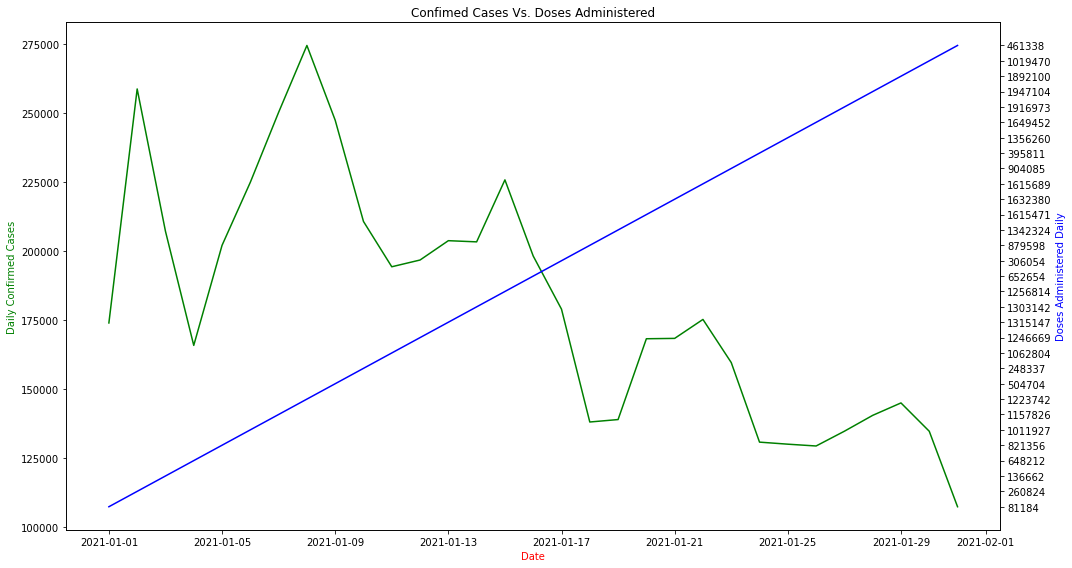

In [106]:
# First I will create a line plot that shows data from my Combined_Covid_Data set and use
# Daily_Confirmed_Cases from our original covid data and Doses_Administered_Daily from my
# original vaccine data for the month of January
# x-axis
x = Combined_Covid_Data.Date
 
# y-axis values
y1 = Combined_Covid_Data.Daily_Confirmed_Cases
 
# secondary y-axis values
y2 = Combined_Covid_Data.Doses_Administered_Daily
 
# plotting figures by creating aexs object
# using subplots() function
fig, ax = plt.subplots(figsize = (15, 8))
plt.title('Confimed Cases Vs. Doses Administered')
 
# using the twinx() for creating another
# axes object for secondary y-Axis
ax2 = ax.twinx()
ax.plot(x, y1, color = 'g')
ax2.plot(x, y2, color = 'b')
 
# giving labels to the axises
ax.set_xlabel('Date', color = 'r')
ax.set_ylabel('Daily Confirmed Cases', color = 'g')
 
# secondary y-axis label
ax2.set_ylabel('Doses Administered Daily', color = 'b')
 
# defining display layout
plt.tight_layout()
 
# show plot
plt.show()

As seen above in our line chart we see as the amount of doses are administered over the month of January the daily confirmed cases have decreased. Which shows a positive effect on getting the vaccine and preventing the spread of the Covid-19 Virus. 

## Bar Plot for The Daily Deaths Vs. Fully Vaccinated per Day

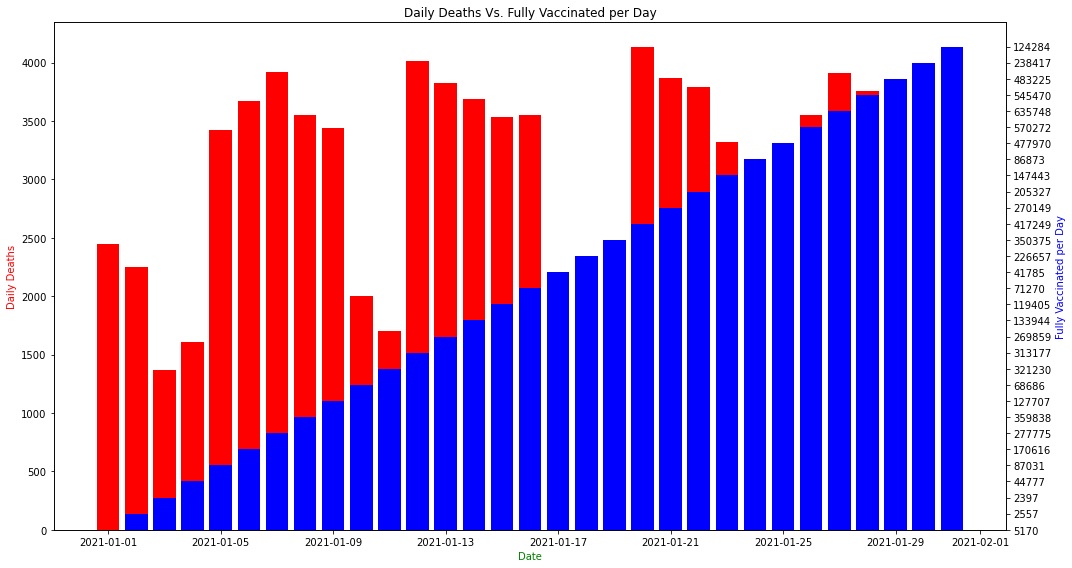

In [112]:
# First I will create a bar plot that shows data from my Combined_Covid_Data set and use
# Daily_Deaths from our original covid data and Fully_Vaccinated_Daily from my
# original vaccine data for the month of January
# x-axis values
x = Combined_Covid_Data.Date
 
#y-axis values
y1 = Combined_Covid_Data.Daily_Deaths
 
# secondary y-axis values
y2 = Combined_Covid_Data.Fully_Vaccinated_Daily
 
# plotting figures by creating aexs object
# using subplots() function
fig, ax = plt.subplots(figsize = (15, 8))
plt.title('Daily Deaths Vs. Fully Vaccinated per Day')
 
# using the twinx() for creating
# another axes object for secondary y-Axis
ax2 = ax.twinx()
# creating a bar plot
ax.bar(x, y1, color = 'r')
ax2.bar(x, y2, color = 'b')

# giving labels to the axises
ax.set_xlabel('Date', color = 'g')
ax.set_ylabel('Daily Deaths', color = 'r')
 
# secondary y-axis label
ax2.set_ylabel('Fully Vaccinated per Day', color = 'b')
 
# defining display layout
plt.tight_layout()
 
# show plot
plt.show()

As seen above in the Daily Deaths Vs. Fully Vaccinated per Day bar plot we see as the fully vaccinated individuals rise throughout the United States for the month of January we see that the death rate drops. Which shows that by getting the vaccine we are lowering our chances to get the virus and or even death.

## Scatter Plot for Daily Recovered Vs. First Dose Admin Daily

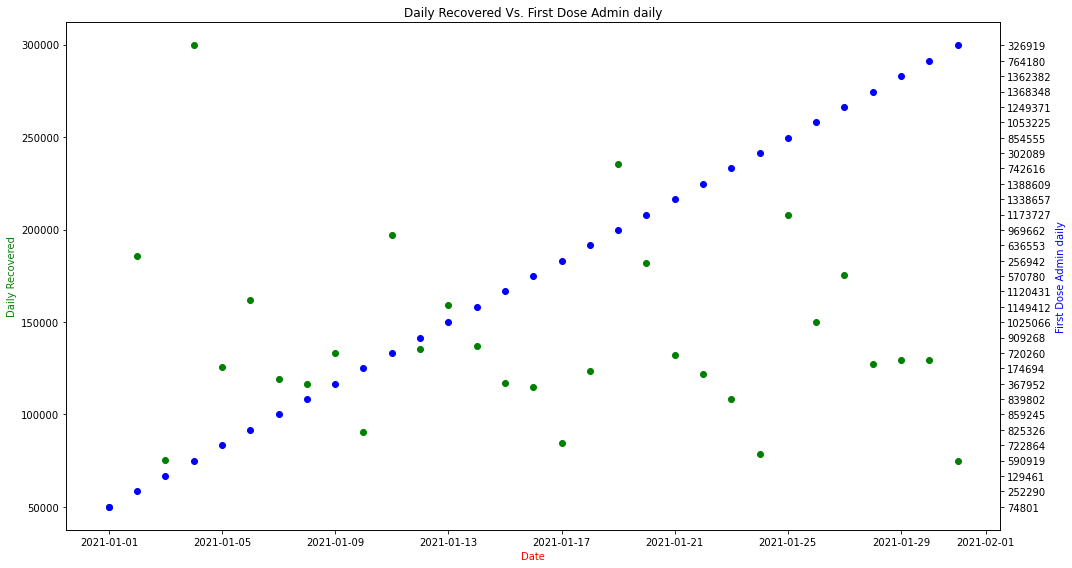

In [117]:
# First I will create a bar plot that shows data from my Combined_Covid_Data set and use
# Daily_Deaths from our original covid data and Fully_Vaccinated_Daily from my
# original vaccine data for the month of January
# x-axis values
x = Combined_Covid_Data.Date
 
#y-axis values
y1 = Combined_Covid_Data.Daily_Recovered
 
# secondary y-axis values
y2 = Combined_Covid_Data.First_Dose_Admin_daily
 
# plotting figures by creating aexs object
# using subplots() function
fig, ax = plt.subplots(figsize = (15, 8))
plt.title('Daily Recovered Vs. First Dose Admin daily')
 
# using the twinx() for creating
# another axes object for secondary y-Axis
ax2 = ax.twinx()
# creating a bar plot
ax.scatter(x, y1, color = 'g')
ax2.scatter(x, y2, color = 'b')

# giving labels to the axises
ax.set_xlabel('Date', color = 'r')
ax.set_ylabel('Daily Recovered', color = 'g')
 
# secondary y-axis label
ax2.set_ylabel('First Dose Admin daily', color = 'b')
 
# defining display layout
plt.tight_layout()
 
# show plot
plt.show()

In the Scatter plot above we see that as the number of first doses administered goes up throughout the month we see that the amount of recoveries per day changes but does not show that much of a similarity between the two as individuals that have contracted the virus most likely did not have the vaccine.

## Line Plot for Total Active Cases Vs. Total Recovered

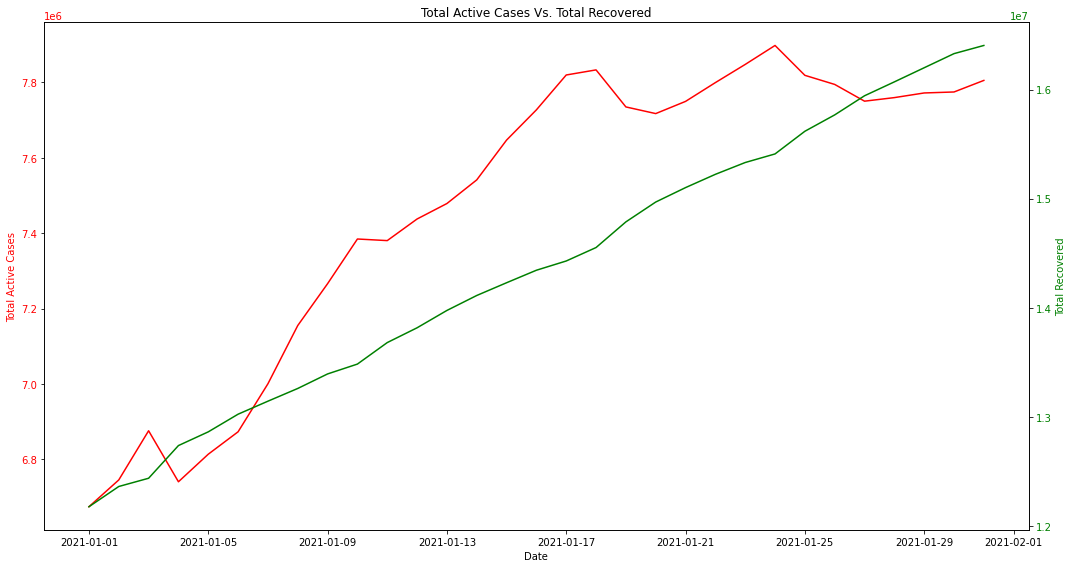

In [136]:
# First I will create a line plot that shows data from my Combined_Covid_Data set and use
# Total_Active from our original covid data and Total_Recovered from my
# original data for the month of January
# Define Data

x = Combined_Covid_Data.Date
data_1 = Combined_Covid_Data.Total_Active
data_2 = Combined_Covid_Data.Total_Recovered
  
# Create Plot

fig, ax1 = plt.subplots(figsize = (15, 8)) 
  
ax1.set_xlabel('Date') 
ax1.set_ylabel('Total Active Cases', color = 'red') 
plot_1 = ax1.plot(x, data_1, color = 'red') 
ax1.tick_params(axis ='y', labelcolor = 'red') 
plt.title('Total Active Cases Vs. Total Recovered')

# Adding Twin Axes

ax2 = ax1.twinx() 
  
ax2.set_ylabel('Total Recovered', color = 'green') 
plot_2 = ax2.plot(x, data_2, color = 'green') 
ax2.tick_params(axis ='y', labelcolor = 'green') 

# defining display layout
plt.tight_layout()


# Show plot

plt.show()

In the line plot above we see that as the total active cases rises so does the total recoveries. But once we reach the end of the month we see that the the totalactive cases lowers while the total cases recovered increases which show we are gaining more recoveries than we have total active cases. 

## Bar Chart for Rolling Data for Fully Vaccinated

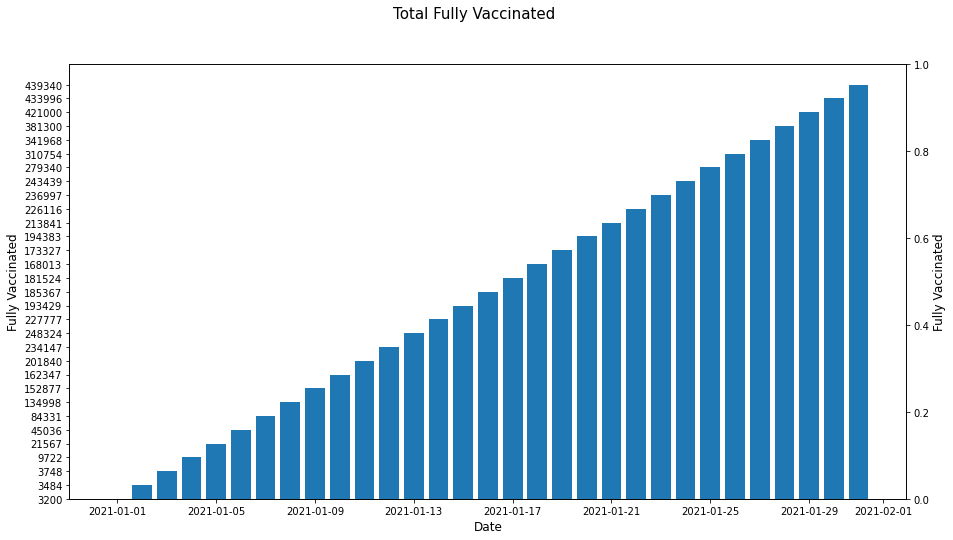

In [140]:
# First I will create a line plot that shows data from my Combined_Covid_Data set and use
# Total_Active from our original covid data and Total_Recovered from my
# original data for the month of January

# x axis values
x = Combined_Covid_Data.Date
# corresponding y axis values
y = Combined_Covid_Data.Fully_Vaccinated_Rolling

fig,axes=plt.subplots(figsize = (15, 8))
axes.bar(x,y)
y1, y2 = axes.get_ylim() 
axes.set_xlabel("Date",fontsize=12)
axes.set_ylabel("Fully Vaccinated",fontsize=12)

twin_axes=axes.twinx() 
twin_axes.set_ylabel("Fully Vaccinated",fontsize=12)

fig.suptitle("Total Fully Vaccinated",fontsize=15)
plt.show()

As seen above we see that as the month goes on we see a large increase in fully vaccinated individuals as the month goes on. As on the 1st of January we see we have 3200 individuals that are fully vaccinated the we have 439,340 individuals that are fully vaccinates.

## Creating Databases for Combined_Covid_Data

In [142]:
# First I will create the connection using the imported create_engine 
# function and then invoking the connect method on it.
engine = create_engine('sqlite:///Combined_Covid_Data.db', echo=True)
sqlite_connection = engine.connect()

2021-11-11 14:21:05,824 INFO sqlalchemy.engine.base.Engine SELECT CAST('test plain returns' AS VARCHAR(60)) AS anon_1
2021-11-11 14:21:05,838 INFO sqlalchemy.engine.base.Engine ()
2021-11-11 14:21:05,842 INFO sqlalchemy.engine.base.Engine SELECT CAST('test unicode returns' AS VARCHAR(60)) AS anon_1
2021-11-11 14:21:05,846 INFO sqlalchemy.engine.base.Engine ()


In [143]:
# Next I will name my sqlite table and upload the table to the database
sqlite_table = "Combined_Covid_Data"
Combined_Covid_Data.to_sql(sqlite_table, sqlite_connection, if_exists='fail')

2021-11-11 14:23:05,275 INFO sqlalchemy.engine.base.Engine PRAGMA main.table_info("Combined_Covid_Data")
2021-11-11 14:23:05,285 INFO sqlalchemy.engine.base.Engine ()
2021-11-11 14:23:05,303 INFO sqlalchemy.engine.base.Engine PRAGMA temp.table_info("Combined_Covid_Data")
2021-11-11 14:23:05,306 INFO sqlalchemy.engine.base.Engine ()
2021-11-11 14:23:05,422 INFO sqlalchemy.engine.base.Engine 
CREATE TABLE "Combined_Covid_Data" (
	"index" BIGINT, 
	"Date" DATETIME, 
	"Daily_Confirmed_Cases" BIGINT, 
	"Total_Confirmed_Cases" BIGINT, 
	"Daily_Deaths" BIGINT, 
	"Total_Deaths" BIGINT, 
	"Daily_Recovered" BIGINT, 
	"Total_Recovered" BIGINT, 
	"Total_Active" BIGINT, 
	"State" TEXT, 
	"Doses_Administered_Daily" TEXT, 
	"Doses_Administered_Cumulative" TEXT, 
	"Doses_Administered_7_Day_Rolling" TEXT, 
	"First_Dose_Admin_daily" TEXT, 
	"First_Dose_Admin_Cumulative" TEXT, 
	"First_Dose_Admin_rolling" BIGINT, 
	"Administered_Daily_Change" TEXT, 
	"Administered_Daily_Change_Average" TEXT, 
	"Fully_Vac

In [144]:
# Next we will take a look at the data through the sqlite3 command 
# line viewer to make sure it was properly saved to the SQLite file
sqlite3

<module 'sqlite3' from '/Users/Robyn/opt/anaconda3/lib/python3.8/sqlite3/__init__.py'>

In [146]:
# Next I will open my data frame back up from sql lite
# Read sqlite query results into a pandas DataFrame
SQL_Combined_Covid_Data = pd.read_sql_query("select * from Combined_Covid_Data", sqlite_connection)

# Verify that result of SQL query is stored in the dataframe
print(SQL_Combined_Covid_Data.head())

2021-11-11 14:29:04,120 INFO sqlalchemy.engine.base.Engine select * from Combined_Covid_Data
2021-11-11 14:29:04,124 INFO sqlalchemy.engine.base.Engine ()
   index                        Date  Daily_Confirmed_Cases  \
0      0  2021-01-01 00:00:00.000000                 174071   
1      1  2021-01-02 00:00:00.000000                 258867   
2      2  2021-01-03 00:00:00.000000                 207306   
3      3  2021-01-04 00:00:00.000000                 165938   
4      4  2021-01-05 00:00:00.000000                 202188   

   Total_Confirmed_Cases  Daily_Deaths  Total_Deaths  Daily_Recovered  \
0               19179864          2444        329311            50035   
1               19438731          2252        331563           185546   
2               19646037          1370        332933            75571   
3               19811975          1608        334541           299554   
4               20014163          3424        337965           125704   

   Total_Recovered  Total_A

In [147]:
# Last I will check and make sure my Data frame for my SQL_Combined_Covid_Data is available and correct
SQL_Combined_Covid_Data

,index,Date,Daily_Confirmed_Cases,Total_Confirmed_Cases,Daily_Deaths,Total_Deaths,Daily_Recovered,Total_Recovered,Total_Active,State,...,Doses_Administered_7_Day_Rolling,First_Dose_Admin_daily,First_Dose_Admin_Cumulative,First_Dose_Admin_rolling,Administered_Daily_Change,Administered_Daily_Change_Average,Fully_Vaccinated_Daily,Fully_Vaccinated_Cumulative,Fully_Vaccinated_Rolling,Month
0,0,2021-01-01 00:00:00.000000,174071,19179864,2444,329311,50035,12175841,6674712,US,...,410275,74801,5550563,400961,81184,410275,5170,36005,3200,January
1,1,2021-01-02 00:00:00.000000,258867,19438731,2252,331563,185546,12361387,6745781,US,...,427418,252290,5802853,417296,260824,427418,2557,38562,3484,January
2,2,2021-01-03 00:00:00.000000,207306,19646037,1370,332933,75571,12436958,6876146,US,...,433254,129461,5932314,422503,136662,433254,2397,40959,3748,January
3,3,2021-01-04 00:00:00.000000,165938,19811975,1608,334541,299554,12736512,6740922,US,...,442165,590919,6523233,424906,648212,442166,44777,85736,9722,January
4,4,2021-01-05 00:00:00.000000,202188,20014163,3424,337965,125704,12862216,6813982,US,...,457415,722864,7246097,428427,821356,457416,87031,172767,21567,January
5,5,2021-01-06 00:00:00.000000,225048,20239211,3670,341635,161926,13024142,6873434,US,...,482702,825326,8071423,429444,1011927,482702,170616,343383,45036,January
6,6,2021-01-07 00:00:00.000000,250394,20489605,3916,345551,119175,13143317,7000737,US,...,588284,859245,8930668,493558,1157826,588284,277775,621158,84331,January
7,7,2021-01-08 00:00:00.000000,274627,20764232,3555,349106,116632,13259949,7155177,US,...,751507,839802,9770470,602844,1223742,751507,359838,980996,134998,January
8,8,2021-01-09 00:00:00.000000,247540,21011772,3437,352543,133129,13393078,7266151,US,...,786347,367952,10138422,619367,504704,786347,127707,1108703,152877,January
9,9,2021-01-10 00:00:00.000000,210847,21222619,2004,354547,90412,13483490,7384582,US,...,802300,174694,10313116,625829,248337,802301,68686,1177389,162347,January
